In [8]:
using Distributions,SpecialFunctions,Statistics,DataFrames,Plots,Random,DelimitedFiles,Pkg
Pkg.add("HypothesisTests")
using HypothesisTests
pyplot()


 Resolving package versions...
 Installed Polynomials ───── v0.5.1
 Installed Combinatorics ─── v0.7.0
 Installed HypothesisTests ─ v0.8.0
 Installed Roots ─────────── v0.7.3
  Updating `~/.julia/environments/v1.0/Project.toml`
  [09f84164] + HypothesisTests v0.8.0
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [861a8166] + Combinatorics v0.7.0
  [09f84164] + HypothesisTests v0.8.0
  [f27b6e38] + Polynomials v0.5.1
  [f2b01f46] + Roots v0.7.3


┌ Info: Precompiling HypothesisTests [09f84164-cd44-5f33-b23f-e6b0d136a0d5]
└ @ Base loading.jl:1186


Plots.PyPlotBackend()

In [3]:
Data = readdlm("companylist.csv",',')

3427×10 Array{Any,2}:
 "Symbol"  "Name"                                      "LastSale"  …  ""
 "YI"      "111, Inc."                                9.8             ""
 "PIH"     "1347 Property Insurance Holdings, Inc."   5.55            ""
 "PIHPP"   "1347 Property Insurance Holdings, Inc."  25.1             ""
 "TURN"    "180 Degree Capital Corp."                 2.02            ""
 "FLWS"    "1-800 FLOWERS.COM, Inc."                 12.95         …  ""
 "FCCY"    "1st Constitution Bancorp (NJ)"           20.12            ""
 "SRCE"    "1st Source Corporation"                  46.54            ""
 "VNET"    "21Vianet Group, Inc."                    10.91            ""
 "TWOU"    "2U, Inc."                                51.77            ""
 "TPNL"    "3PEA International, Inc."                 3.8          …  ""
 "JOBS"    "51job, Inc."                             66.64            ""
 "EGHT"    "8x8 Inc"                                 18.17            ""
 ⋮                           

3420×10 Array{Any,2}:
 "YI"     "111, Inc."                                9.8   …  ""
 "PIH"    "1347 Property Insurance Holdings, Inc."   5.55     ""
 "PIHPP"  "1347 Property Insurance Holdings, Inc."  25.1      ""
 "TURN"   "180 Degree Capital Corp."                 2.02     ""
 "FLWS"   "1-800 FLOWERS.COM, Inc."                 12.95     ""
 "FCCY"   "1st Constitution Bancorp (NJ)"           20.12  …  ""
 "SRCE"   "1st Source Corporation"                  46.54     ""
 "VNET"   "21Vianet Group, Inc."                    10.91     ""
 "TWOU"   "2U, Inc."                                51.77     ""
 "TPNL"   "3PEA International, Inc."                 3.8      ""
 "JOBS"   "51job, Inc."                             66.64  …  ""
 "EGHT"   "8x8 Inc"                                 18.17     ""
 "AAON"   "AAON, Inc."                              41.52     ""
 ⋮                                                         ⋱    
 "ZN"     "Zion Oil & Gas Inc"                       1.15     ""
 "Z

In [15]:
NASDAQ = DataFrame(New_Data)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,YI,"111, Inc.",9.8,78248639,7984555,2018,Health Care,Medical/Nursing Services,https://www.nasdaq.com/symbol/yi,
2,PIH,"1347 Property Insurance Holdings, Inc.",5.55,3.32155e7,n/a,2014,Finance,Property-Casualty Insurers,https://www.nasdaq.com/symbol/pih,
3,PIHPP,"1347 Property Insurance Holdings, Inc.",25.1,0,n/a,n/a,Finance,Property-Casualty Insurers,https://www.nasdaq.com/symbol/pihpp,
4,TURN,180 Degree Capital Corp.,2.02,6.28656e7,n/a,n/a,Finance,Finance/Investors Services,https://www.nasdaq.com/symbol/turn,
5,FLWS,"1-800 FLOWERS.COM, Inc.",12.95,8.3111e8,n/a,1999,Consumer Services,Other Specialty Stores,https://www.nasdaq.com/symbol/flws,
6,FCCY,1st Constitution Bancorp (NJ),20.12,1.69094e8,n/a,n/a,Finance,Savings Institutions,https://www.nasdaq.com/symbol/fccy,
7,SRCE,1st Source Corporation,46.54,1.20841e9,n/a,n/a,Finance,Major Banks,https://www.nasdaq.com/symbol/srce,
8,VNET,"21Vianet Group, Inc.",10.91,6.77039e8,62056704,2011,Technology,"Computer Software: Programming, Data Processing",https://www.nasdaq.com/symbol/vnet,
9,TWOU,"2U, Inc.",51.77,2.99865e9,n/a,2014,Technology,Computer Software: Prepackaged Software,https://www.nasdaq.com/symbol/twou,


In [16]:
rename!(NASDAQ, :x3 => :price)

,x1,x2,price,x4,x5,x6,x7,x8,x9,x10
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,YI,"111, Inc.",9.8,78248639,7984555,2018,Health Care,Medical/Nursing Services,https://www.nasdaq.com/symbol/yi,
2,PIH,"1347 Property Insurance Holdings, Inc.",5.55,3.32155e7,n/a,2014,Finance,Property-Casualty Insurers,https://www.nasdaq.com/symbol/pih,
3,PIHPP,"1347 Property Insurance Holdings, Inc.",25.1,0,n/a,n/a,Finance,Property-Casualty Insurers,https://www.nasdaq.com/symbol/pihpp,
4,TURN,180 Degree Capital Corp.,2.02,6.28656e7,n/a,n/a,Finance,Finance/Investors Services,https://www.nasdaq.com/symbol/turn,
5,FLWS,"1-800 FLOWERS.COM, Inc.",12.95,8.3111e8,n/a,1999,Consumer Services,Other Specialty Stores,https://www.nasdaq.com/symbol/flws,
6,FCCY,1st Constitution Bancorp (NJ),20.12,1.69094e8,n/a,n/a,Finance,Savings Institutions,https://www.nasdaq.com/symbol/fccy,
7,SRCE,1st Source Corporation,46.54,1.20841e9,n/a,n/a,Finance,Major Banks,https://www.nasdaq.com/symbol/srce,
8,VNET,"21Vianet Group, Inc.",10.91,6.77039e8,62056704,2011,Technology,"Computer Software: Programming, Data Processing",https://www.nasdaq.com/symbol/vnet,
9,TWOU,"2U, Inc.",51.77,2.99865e9,n/a,2014,Technology,Computer Software: Prepackaged Software,https://www.nasdaq.com/symbol/twou,


In [62]:
by(NASDAQ, :price, df -> reverse(digits(df)))

MethodError: MethodError: no method matching digits(::SubDataFrame{Array{Int64,1}})
Closest candidates are:
  digits(!Matched::Integer; base, pad) at intfuncs.jl:704
  digits(!Matched::Type{#s55} where #s55<:Integer, !Matched::Integer; base, pad) at intfuncs.jl:708

In [166]:
digits(0.534)

MethodError: MethodError: no method matching digits(::Float64)
Closest candidates are:
  digits(!Matched::Integer; base, pad) at intfuncs.jl:704
  digits(!Matched::Type{#s55} where #s55<:Integer, !Matched::Integer; base, pad) at intfuncs.jl:708

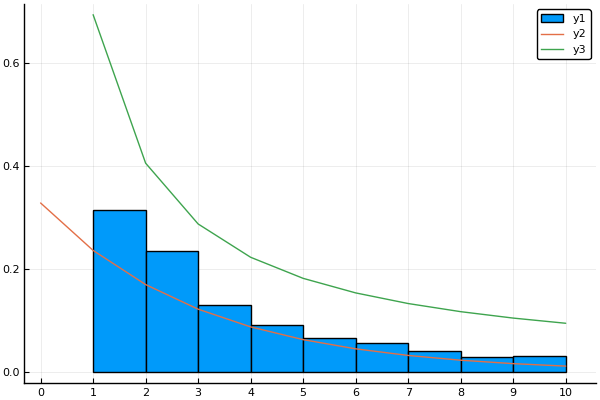

In [16]:
using Plots,Statistics,Distributions

n = 10

t = 2 .*rand(n) .+ 1

y = ((rand(n).*0.04).-0.02).*t

X = [y ones(n)]

T = [t ones(n)]

w = [1;1]

function pred(X,w)

    P = X*w

    return P
end

function weightgrad(X,n,P,T)
    
    Δ = P.-T

    C_grad = (1/n)*transpose(X)*Δ

    return C_grad
end

function cost(P,T,n)
    
    Δ =  P.-T

    cost = (1/(2*n))*sum(Δ.^2)
    return cost
end


for i=1:n
    P = pred(X,w)
    α = 0.1
    weight = w
    weight_grad = weightgrad(X,n,P,T)
    C = cost(P,T,n)
    w -= - α.*weight_grad
end

linfit = w[1]*collect(1:10) .+ w[2]

plot(t)
plot!(linfit)



DimensionMismatch: DimensionMismatch("dimensions must match")